# Fruit Classification
In this project, we’ll implement several machine learning algorithms in Python using Scikit-learn. The task is to train a classifier to distinguish between different types of fruits.
We'll identify the machine learning algorithm that is best-suited for the problem: We'll compare different algorithms, and select the best-performing one.
## Data
The fruits dataset was created by Dr. Iain Murray from University of Edinburgh. Let’s have a look the first a few rows of the data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
fruits = pd.read_table('fruit_data_with_colors.txt')
fruits.head(10)

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


We can see that each row represents an instance (item), and every instance has 7 features: lable, name, subtype, mass, width, height and color. Let's take a look at the shape to find out how many items are in the dataset:

In [2]:
print(fruits.shape)

(59, 7)


We have 59 pieces of fruits and 7 features in the dataset. Let's find how many types of fruit are there:

In [3]:
print(fruits['fruit_name'].unique())

['apple' 'mandarin' 'orange' 'lemon']


We have four types of fruits in the dataset. Let's have a look of the number of items of each type:

In [4]:
print(fruits.groupby('fruit_name').size())

fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64


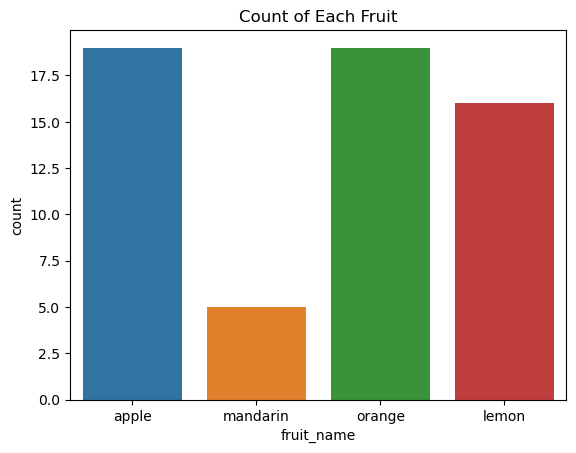

In [5]:
import seaborn as sns
sns.countplot(x='fruit_name', data=fruits)
plt.title("Count of Each Fruit")  # To set a title
plt.show()

## Statistical Summary
The data is pretty balanced except mandarin. Now we can take a look at a summary of each attribute. This includes the count, mean, the min and max values as well as some percentiles.

In [6]:
print(fruits.drop('fruit_label', axis=1).describe())

             mass      width     height  color_score
count   59.000000  59.000000  59.000000    59.000000
mean   163.118644   7.105085   7.693220     0.762881
std     55.018832   0.816938   1.361017     0.076857
min     76.000000   5.800000   4.000000     0.550000
25%    140.000000   6.600000   7.200000     0.720000
50%    158.000000   7.200000   7.600000     0.750000
75%    177.000000   7.500000   8.200000     0.810000
max    362.000000   9.600000  10.500000     0.930000


We can see that the numerical values have different scales and different ranges. We will need to apply scaling later on.
<br> Let's make some statistical calculations:
1. Mass:
    * Sampel Range: 286
    * Inter Quantile Range: 37
    * Step: 55.5
    * Upper Fence: 232.5
    * Lower Fence: 84.5
    * Upper Whisker Length: 185
    * Lower Whisker Length: 64
    * |Q3 - median|: 19
    * |median - Q1|: 18
    * Concetration: IQR / SR = 2/15
    * Conclutions:
        * The longer upper whisker suggests potential outliers or extreme values on the higher end, indicating possible positive skewness
        * The symmetry indicated by the equal distances between the median and quartiles contradicts the skewness suggested by the longer upper whisker.
        * The relatively small middle 50% of the data compared to the overall spread, as indicated by the IQR, suggests skewness.
        * The median being slightly smaller than the mean suggests that there are some smaller values pulling the mean towards the lower end, which may indicate a slight left skew but doesn't provide a definitive indication of skewness.
        * The conflicting indications make it difficult to determine the skewness of the distribution. The longer upper whisker suggests positive skewness, while the equal distances between the median and quartiles suggest symmetry. The relatively small middle 50% of the data compared to the overall spread also suggests skewness. The fact that the median is slightly smaller than the mean may suggest a slight left skew, but it's not conclusive. It's possible that the distribution exhibits some degree of positive skewness due to the longer upper whisker and the relatively small middle 50% of the data, but the symmetry indicated by the equal distances between the median and quartiles complicates the interpretation.
2. Width:
    * Sampel Range: 3.8
    * Inter Quantile Range: 0.9
    * Step: 1.35
    * Upper Fence: 8.85
    * Lower Fence: 5.25
    * Upper Whisker Length: 2.1
    * Lower Whisker Length: 0.8
    * |Q3 - median|: 0.3
    * |median - Q1|: 0.6
    * Concetration: IQR / SR = 1/4
    * Conclutions: 
        * The longer upper whisker suggests potential outliers or extreme values on the higher end, indicating possible positive skewness.
        * The smaller distance between the median and the upper quartile compared to the lower quartile suggests a concentration of data towards the higher end, which could indicate positive skewness.
        * The IQR covering a substantial portion of the overall spread suggests less skewness or symmetry.
        * The similarity between the mean and median suggests symmetry in the distribution.
        * There are indications of both positive skewness (longer upper whisker, smaller distance between median and upper quartile) and symmetry (similar mean and median, IQR covering a substantial portion of the overall spread). The distribution appears to be either symmetric or only slightly positively skewed, given the indicators provided.
3. Height:
    * Sampel Range: 6.5
    * Inter Quantile Range: 1
    * Step: 1.5
    * Upper Fence: 9.7
    * Lower Fence: 5.7
    * Upper Whisker Length: 2.3
    * Lower Whisker Length: 3.2
    * |Q3 - median|: 0.6
    * |median - Q1|: 0.4
    * Concetration: IQR / SR = 2/13
    * Conclutions:
        * The shorter upper whisker suggests potential outliers or extreme values on the lower end, indicating possible negative skewness.
        * The slightly larger distance between the median and the upper quartile compared to the lower quartile suggests a slight concentration of data towards the higher end, which could indicate negative skewness.
        * The IQR covering a relatively small portion of the overall spread suggests skewness.
        * The similarity between the mean and median suggests symmetry in the distribution.
        * There are indications of both negative skewness (shorter upper whisker, slightly larger distance between median and upper quartile) and symmetry (similar mean and median). Overall, the distribution appears to be either symmetric or only slightly negatively skewed, given the indicators provided. However, the negative skewness is not very pronounced.
4. Color:
    * Sampel Range: 0.38
    * Inter Quantile Range: 0.09
    * Step: 0.135
    * Upper Fence: 0.945
    * Lower Fence: 0.585
    * Upper Whisker Length: 0.12
    * Lower Whisker Length: 0.17
    * |Q3 - median|: 0.06
    * |median - Q1|: 0.03
    * Concetration: IQR / SR = 1/4
    * Conclutions:
        * The slightly shorter upper whisker and the larger distance between the median and the upper quartile compared to the lower quartile both suggest a tendency towards negative skewness.
        * The IQR covering a substantial portion of the overall spread suggests less skewness or symmetry.
        * The similarity between the mean and median suggests symmetry in the distribution.
        * There are indications of potential negative skewness (slightly shorter upper whisker, larger distance between median and upper quartile), but the IQR covering a substantial portion of the overall spread and the similarity between the mean and median suggest symmetry or less skewness. Overall, the distribution appears to be either symmetric or only slightly negatively skewed, given the indicators provided. However, the negative skewness is not very pronounced.

## Visualization
Let's plot a boxplot whisker for each numeric variable, in order to visualize the distribution and statistical calculations of the input variables:

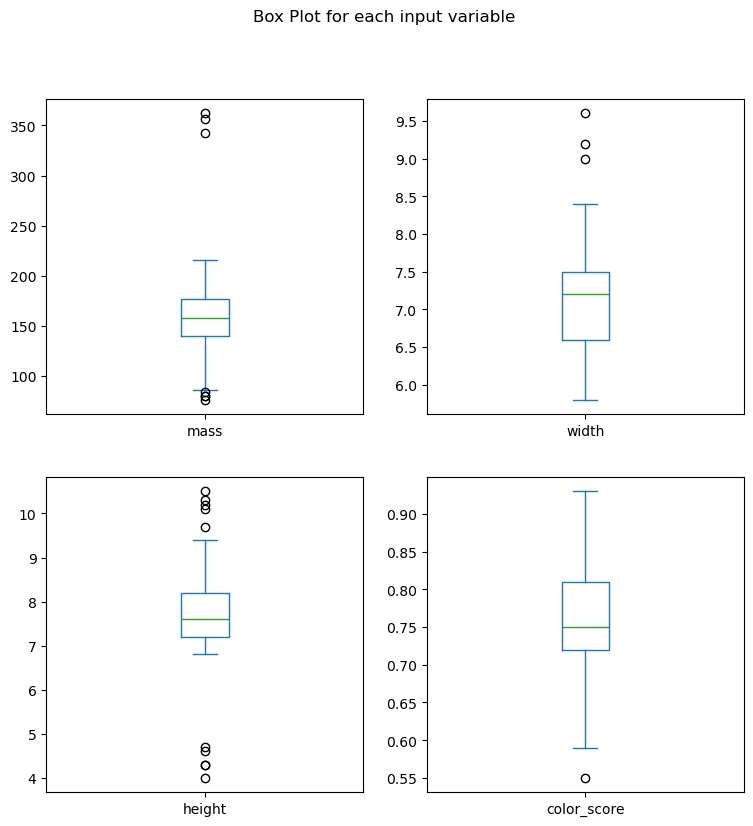

In [7]:
fruits.drop('fruit_label', axis=1).plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(9,9), 
                                        title='Box Plot for each input variable')
plt.savefig('fruits_box')
plt.show()

The above plots, visualize the statistic calculations we found before, It looks like perhaps color score has a near Gaussian distribution, which is a symmetric distribution.
<br> For another vizualization of the distribution of the numeric variables:

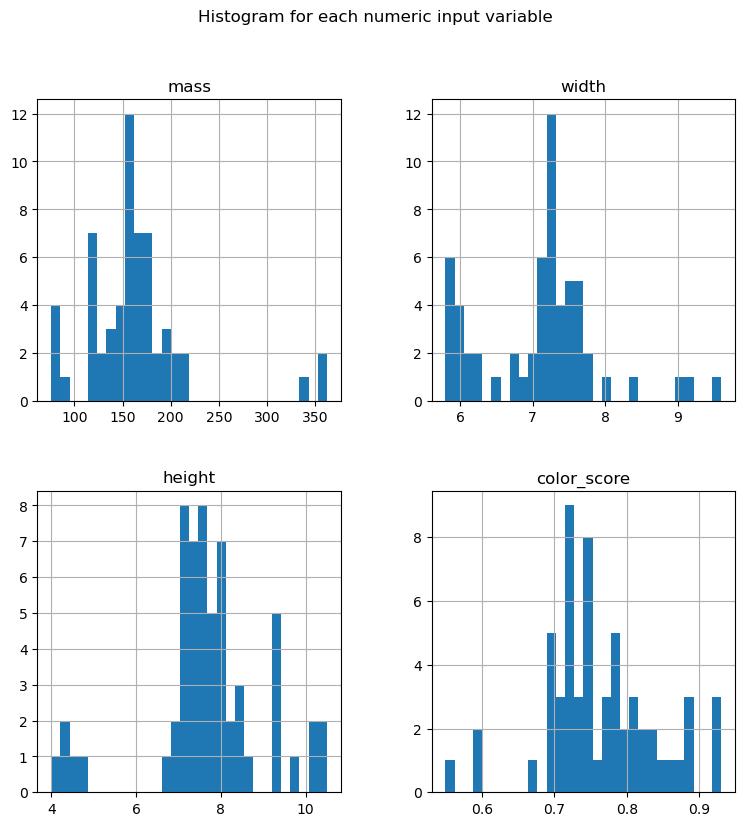

In [8]:
import pylab as pl
fruits.drop('fruit_label' ,axis=1).hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('fruits_hist')
plt.show()

Some pairs of attributes are correlated (mass and width). This suggests a high correlation and a predictable relationship.
<br> Finally, let's plot a scatter-matrix for each input variable:

C:\Users\NOA\AppData\Local\Temp\ipykernel_20796\211612947.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('gnuplot')


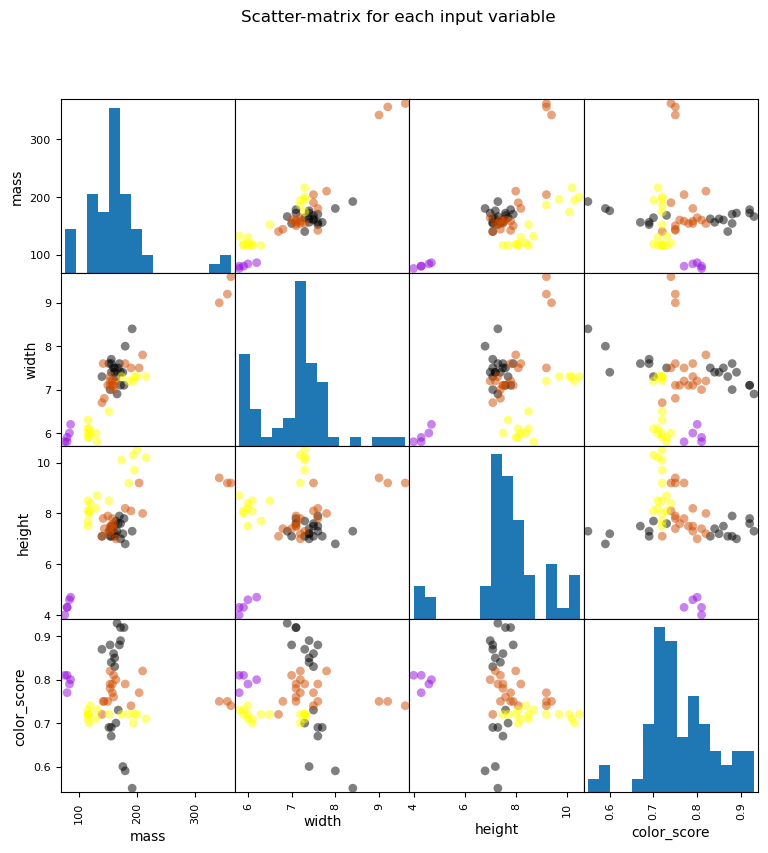

In [9]:
from pandas.plotting import scatter_matrix
from matplotlib import cm
feature_names = ['mass', 'width', 'height', 'color_score']
X = fruits[feature_names]
y = fruits['fruit_label']
cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('fruits_scatter_matrix')

## Create Training and Test Sets and Apply Scaling
We need to split the dataset into trainig dataset and test dataset, later, we'll fit (train) the machine learning models on the training set, and test our models on the test set. In addition, we need to apply scaling to the test set that we computed for the training set.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Build Models
We'll build each machine learning model, train them on the training dataset and calaulate their accuracy on both the training dataset and the test dataset. 
### Logistic regresion

In [11]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train) # Train the model on training dataset
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.75
Accuracy of Logistic regression classifier on test set: 0.47


### Decision Tree

In [12]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.67


### K-Nearest Neighbors

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 1.00


### Linear Discriminate Analysis

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.86
Accuracy of LDA classifier on test set: 0.67


### Gaussian Naive Bayes

In [15]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.86
Accuracy of GNB classifier on test set: 0.67


### Support Vector Machine

In [16]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.91
Accuracy of SVM classifier on test set: 0.80


The KNN algorithm was the most accurate model that we tried (scored 1 on the test dataset and 0.95 on the training dataset). Let's plot a confusion matrix and a classification report to find if there were errors:

In [17]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[4 0 0 0]
 [0 1 0 0]
 [0 0 8 0]
 [0 0 0 2]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         2

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



The confusion matrix provides an indication of no error made on the test set, (in the confusion matrix, all off-diagonal elements are zero, the on-diagonal elements are the amount of items of each kind of fruit).
<br> The precision values (ratio of correctly predicted positive observations to the total predicted positives) are all one, indicating there were no false positives, and the model is accurate in classifying a sample as positive.
<br> The recall values (ratio of correctly predicted positive observations to all the positive observations in the actual class) are all one, indicating there were no false negatives, and the model successfully detected all the positive samples.
<br> The F1 Score values (harmonic mean of Precision and Recall) are all one, indicating both high precision and high recall. It's not very useful, since both false negatives and false positives are zero in this case.
<br> However, the test set was very small.

## Plot the Decision Boundary of the K-NN Classifier

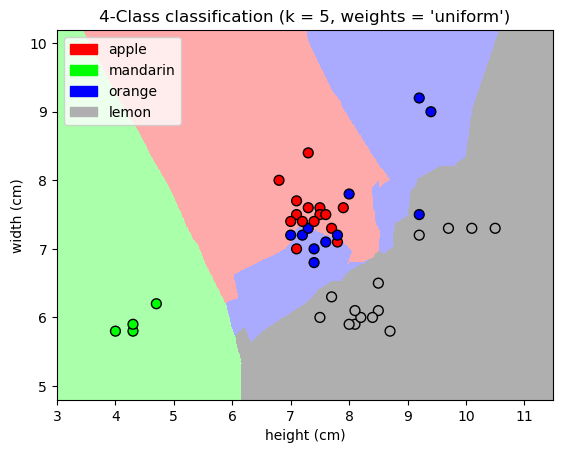

In [27]:
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import matplotlib.patches as mpatches
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

X = fruits[['mass', 'width', 'height', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

def plot_fruit_knn(X, y, n_neighbors, weights):
    X_mat = X[['height', 'width']].to_numpy()
    y_mat = y.to_numpy()

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])

    clf = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)

    # Plot the decision boundary by assigning a color in the color map to each mesh point.
    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    patch0 = mpatches.Patch(color='#FF0000', label='apple')
    patch1 = mpatches.Patch(color='#00FF00', label='mandarin')
    patch2 = mpatches.Patch(color='#0000FF', label='orange')
    patch3 = mpatches.Patch(color='#AFAFAF', label='lemon')
    plt.legend(handles=[patch0, patch1, patch2, patch3])
    plt.xlabel('height (cm)')
    plt.ylabel('width (cm)')
    plt.title("4-Class classification (k = %i, weights = '%s')"% (n_neighbors, weights))    
    plt.show()


plot_fruit_knn(X_train, y_train, 5, 'uniform')

Let's find the value of K that will obtain the highest accuracy for this dataset:

([<matplotlib.axis.XTick at 0x1825e25d650>,
 [Text(0, 0, '0'),
  Text(5, 0, '5'),
  Text(10, 0, '10'),
  Text(15, 0, '15'),
  Text(20, 0, '20')])

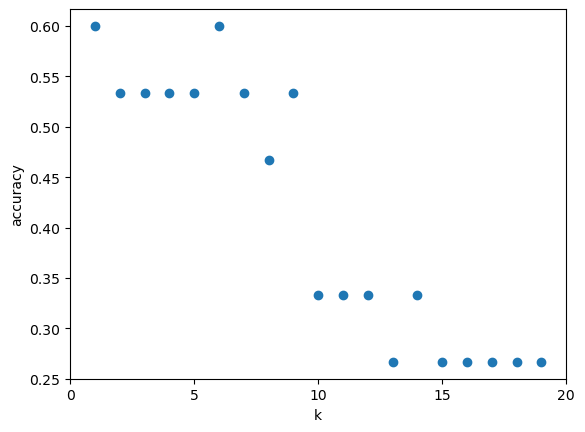

In [28]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])